In [1]:
#Load csv data

import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import pandas as pd
import numpy as np
import tempfile
import urllib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.contrib import rnn
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

tf.reset_default_graph()

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


COLUMNS = [
    "id", "diagnosis",  "radius", "texture",
    "perimeter", "area", "smootheness", "compactness", "concavity",
    "concave_points", "symmetry", "fractal_dimension", "radius_se", "texture_se",
    "perimeter_se", "area_se", "smootheness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smootheness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

df_dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
                       , names=COLUMNS
                       , skipinitialspace=True)
print(df_dataset)

           id diagnosis  radius  texture  perimeter    area  smootheness  \
0      842302         M  17.990    10.38     122.80  1001.0      0.11840   
1      842517         M  20.570    17.77     132.90  1326.0      0.08474   
2    84300903         M  19.690    21.25     130.00  1203.0      0.10960   
3    84348301         M  11.420    20.38      77.58   386.1      0.14250   
4    84358402         M  20.290    14.34     135.10  1297.0      0.10030   
5      843786         M  12.450    15.70      82.57   477.1      0.12780   
6      844359         M  18.250    19.98     119.60  1040.0      0.09463   
7    84458202         M  13.710    20.83      90.20   577.9      0.11890   
8      844981         M  13.000    21.82      87.50   519.8      0.12730   
9    84501001         M  12.460    24.04      83.97   475.9      0.11860   
10     845636         M  16.020    23.24     102.70   797.8      0.08206   
11   84610002         M  15.780    17.89     103.60   781.0      0.09710   
12     84622

In [2]:
#Create Feature & Label Columns

feature_columns = df_dataset.drop(['id', 'diagnosis'], axis=1)
print(feature_columns)
label_column = df_dataset.drop(["id", "radius", "texture",
    "perimeter", "area", "smootheness", "compactness", "concavity",
    "concave_points", "symmetry", "fractal_dimension", "radius_se", "texture_se",
    "perimeter_se", "area_se", "smootheness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smootheness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"], axis=1)



label_column.replace('M', 1,  inplace=True)
label_column.replace('B', 0,  inplace=True)
print(label_column)

     radius  texture  perimeter    area  smootheness  compactness  concavity  \
0    17.990    10.38     122.80  1001.0      0.11840      0.27760   0.300100   
1    20.570    17.77     132.90  1326.0      0.08474      0.07864   0.086900   
2    19.690    21.25     130.00  1203.0      0.10960      0.15990   0.197400   
3    11.420    20.38      77.58   386.1      0.14250      0.28390   0.241400   
4    20.290    14.34     135.10  1297.0      0.10030      0.13280   0.198000   
5    12.450    15.70      82.57   477.1      0.12780      0.17000   0.157800   
6    18.250    19.98     119.60  1040.0      0.09463      0.10900   0.112700   
7    13.710    20.83      90.20   577.9      0.11890      0.16450   0.093660   
8    13.000    21.82      87.50   519.8      0.12730      0.19320   0.185900   
9    12.460    24.04      83.97   475.9      0.11860      0.23960   0.227300   
10   16.020    23.24     102.70   797.8      0.08206      0.06669   0.032990   
11   15.780    17.89     103.60   781.0 

In [3]:
# Splitting data into training and test set

feature_columns = preprocessing.normalize(feature_columns, norm="l2", axis=1, copy=True, return_norm=False)
print(feature_columns)
X_train, X_test, Y_train, Y_test = train_test_split(feature_columns,label_column, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


[[7.92541486e-03 4.57286305e-03 5.40989964e-02 ... 1.16920795e-04
  2.02695018e-04 5.23808686e-05]
 [8.66575595e-03 7.48616836e-03 5.59882822e-02 ... 7.83583182e-05
  1.15852352e-04 3.75024596e-05]
 [9.36668268e-03 1.01087865e-02 6.18419883e-02 ... 1.15596947e-04
  1.71873157e-04 4.16624718e-05]
 ...
 [1.16438847e-02 1.96964025e-02 7.59658259e-02 ... 9.94640269e-05
  1.55579134e-04 5.48525170e-05]
 [9.23020523e-03 1.31418408e-02 6.27743569e-02 ... 1.18738077e-04
  1.83125480e-04 5.55604587e-05]
 [2.31098880e-02 7.30820427e-02 1.42709515e-01 ... 0.00000000e+00
  8.55006294e-04 2.09626935e-04]]
(455, 30) (455, 1)
(114, 30) (114, 1)


In [4]:
#Constant initialization
epochs = 500
n_classes = 1
n_units = 200
n_features = 30
batch_size = 10
learning_rate = 0.00001


In [5]:
#Placeholder initialization

X = tf.placeholder('float',[None, 30])
Y = tf.placeholder('float',[None, 1])

#Variable initialization
weights = {
    'out': tf.Variable(tf.random_normal([n_units, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [6]:
#RNN model builder

def recurrent_neural_network_model(x, weights, biases):

    x = tf.reshape(x, [-1, 30])
    x = tf.split(x, 30, 1)

    lstm_cell = tf.nn.rnn_cell.LSTMCell(n_units) 
    outputs, states = tf.nn.static_rnn(lstm_cell, x, dtype=tf.float32)
    
    output = tf.matmul(outputs[-1], weights['out']) + biases['out']

    return output

Epoch 500 completed out of 500 loss: 6.467866743449122
F1 Score: 0.8420151626314503
Accuracy Score: 0.8508771929824561
Recall: 0.8974358974358975
Precision: 0.7291666666666666
Confusion Matrix:
 [[62 13]
 [ 4 35]]


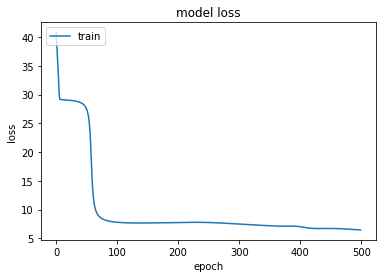

In [7]:
#Training and evaluation of the model

def train_neural_network():
    logit = recurrent_neural_network_model(X, weights, biases)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            sess.run(tf.local_variables_initializer())
            L = []
            for epoch in range(epochs):
                epoch_loss = 0
                for i in range(int(len(X_train) / batch_size)):

                    start = i
                    end = i + batch_size

                    batch_x = np.array(X_train[start:end])
                    batch_y = np.array(Y_train[start:end])
                    loss = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})

                    epoch_loss += loss[1]
                    i += batch_size    
                L.append(epoch_loss)

            plt.plot(L)
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')

            print('Epoch', epoch+1, 'completed out of', epochs, 'loss:', epoch_loss)

            pred = tf.round(tf.nn.sigmoid(logit)).eval({X: np.array(X_test), Y: np.array(Y_test)})
            f1 = f1_score(np.array(Y_test), pred, average='macro') 
            accuracy=accuracy_score(np.array(Y_test), pred)
            recall = recall_score(y_true=np.array(Y_test), y_pred= pred)
            precision = precision_score(y_true=np.array(Y_test), y_pred=pred)

            print("F1 Score:", f1)
            print("Accuracy Score:",accuracy)
            print("Recall:", recall)
            print("Precision:", precision)

            confusion_matrix = tf.confusion_matrix(tf.reshape(np.array(Y_test), [-1]), tf.reshape(pred,[-1]) , 2)
            print("Confusion Matrix:\n", confusion_matrix.eval())
            
            plt.show()
            
train_neural_network()

